# Iterative Methods

$2x_1 + x_2 + x_3 = 7$  
$-x_1 + 3x_2 - x_3 = 2$  
$x_1 - x_2 + 2x_3 = 5$  

### Rearrange the first equation
$x_1 = \left(7 - x_2 - x_3\right)/2$  
$x_2 = \left(2 + x_1 + x_3\right)/3$  
$x_3 = \left(5 - x_1 + x_2\right)/2$  

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import *

A = np.array([[2,1,1],[-1,3,-1],[1,-1,2]], float)
b = np.array([7,2,5], float)

In [18]:
np.linalg.solve(A,b)

array([1., 2., 3.])

In [19]:
n = 3
u0 = np.zeros(n)
tol = 1e-5

## **Jacobi Iteration Method**  
$x_i^{(k)}=\sum_{\begin{matrix}j=1\\j\neq i\\\end{matrix}}^{n}{\left(\frac{-a_{ij}}{a_{ii}}\right)x_j^{\left(k-1\right)}}+\frac{b_i}{a_{ii}}\ \ \left(i=1,\ 2,\ldots,n\ \right)$

In [20]:
u = u0.copy()
unew = u0.copy()
err = 1000
it = 1
while err > tol:
    # loop over interior points = don't touch boundary points
    for i in range(n):
        ax_sum = 0
        for j in range(n):
            if(i != j):
                ax_sum += A[i,j]*u[j]
        unew[i] = (b[i] - ax_sum)/A[i,i]
    err = np.linalg.norm(unew - u, 2)
    u = unew.copy()
    it += 1
print('err = %1.3e'% err, ' it = %d' %it)
unew.round(2)

err = 7.906e-06  it = 22


array([1., 2., 3.])

## **Gauss Seidel Iteration Method**
$x_i^{(k)}=\sum_{j=1}^{i-1}{\left(\frac{-a_{ij}}{a_{ii}}\right)x_j^{\left(k\right)}}+\sum_{j=i+1}^{n}{\left(\frac{-a_{ij}}{a_{ii}}\right)x_j^{\left(k-1\right)}}+\frac{b_i}{a_{ii}}\ \ \left(i=1,\ 2,\ldots,n\ \right)$

In [21]:
u = u0.copy()
err = 1000
it = 1
while err > tol:
    uold = u.copy()
    # loop over interior points = don't touch boundary points
    for i in range(n):
        ax_sum = 0
        for j in range(n):
            if(i != j):
                ax_sum += A[i,j]*u[j]
        u[i] = (b[i] - ax_sum)/A[i,i]
    err = np.linalg.norm(uold - u, 2)
    it += 1
print('err = %1.3e'% err, ' it = %d' %it)
u.round(2)

err = 6.102e-06  it = 16


array([1., 2., 3.])

## **Relaxation Method**  
$x_i^{(k)}=x_i^{(k-1)}+\alpha \left[\sum_{j=1}^{n}{\left(\frac{-a_{ij}}{a_{ii}}\right)x_j^{\left(k-1\right)}}
+\frac{b_i}{a_{ii}}\right]\ \ \left(i=1,\ 2,\ldots,n\ \right)$

In [27]:
u = u0.copy()
unew = u0.copy()
err = 1000
it = 1
alpha = 0.2
while err > tol:
    # loop over interior points = don't touch boundary points
    for i in range(n):
        ax_sum = 0
        for j in range(n):
            ax_sum += A[i,j]*u[j]
        unew[i] = u[i] + alpha*(b[i] - ax_sum)/A[i,i]
    err = np.linalg.norm(unew - u, 2)
    u = unew.copy()
    it += 1
print('err = %1.3e'% err, ' it = %d' %it)
u.round(2)

err = 9.612e-06  it = 107


array([1., 2., 3.])

## Relaxation Method according to the Relaxation Parameter

In [28]:
def Relaxation(alpha, n):
    u = u0.copy()
    unew = u0.copy()
    err = 1000
    it = 1
#     alpha = 0.2
    while err > tol:
        # loop over interior points = don't touch boundary points
        for i in range(n):
            ax_sum = 0
            for j in range(n):
                ax_sum += A[i,j]*u[j]
            unew[i] = u[i] + alpha*(b[i] - ax_sum)/A[i,i]
        err = np.linalg.norm(unew - u, 2)
        u = unew.copy()
        it += 1
    # print('err = %1.3e'% err, ' it = %d' %it)
    # u.round(2)
    return u, err, it

In [29]:
n = 10
alpha = np.linspace(0.1,1.3,n)
sol, err, it = np.ones((n, 3)), np.ones(n), np.ones(n)
for i in range(n):
    sol_a, err_b, it_c = Relaxation(alpha[i], 3)
    sol[i], err[i], it[i] = sol_a.copy(), err_b, it_c

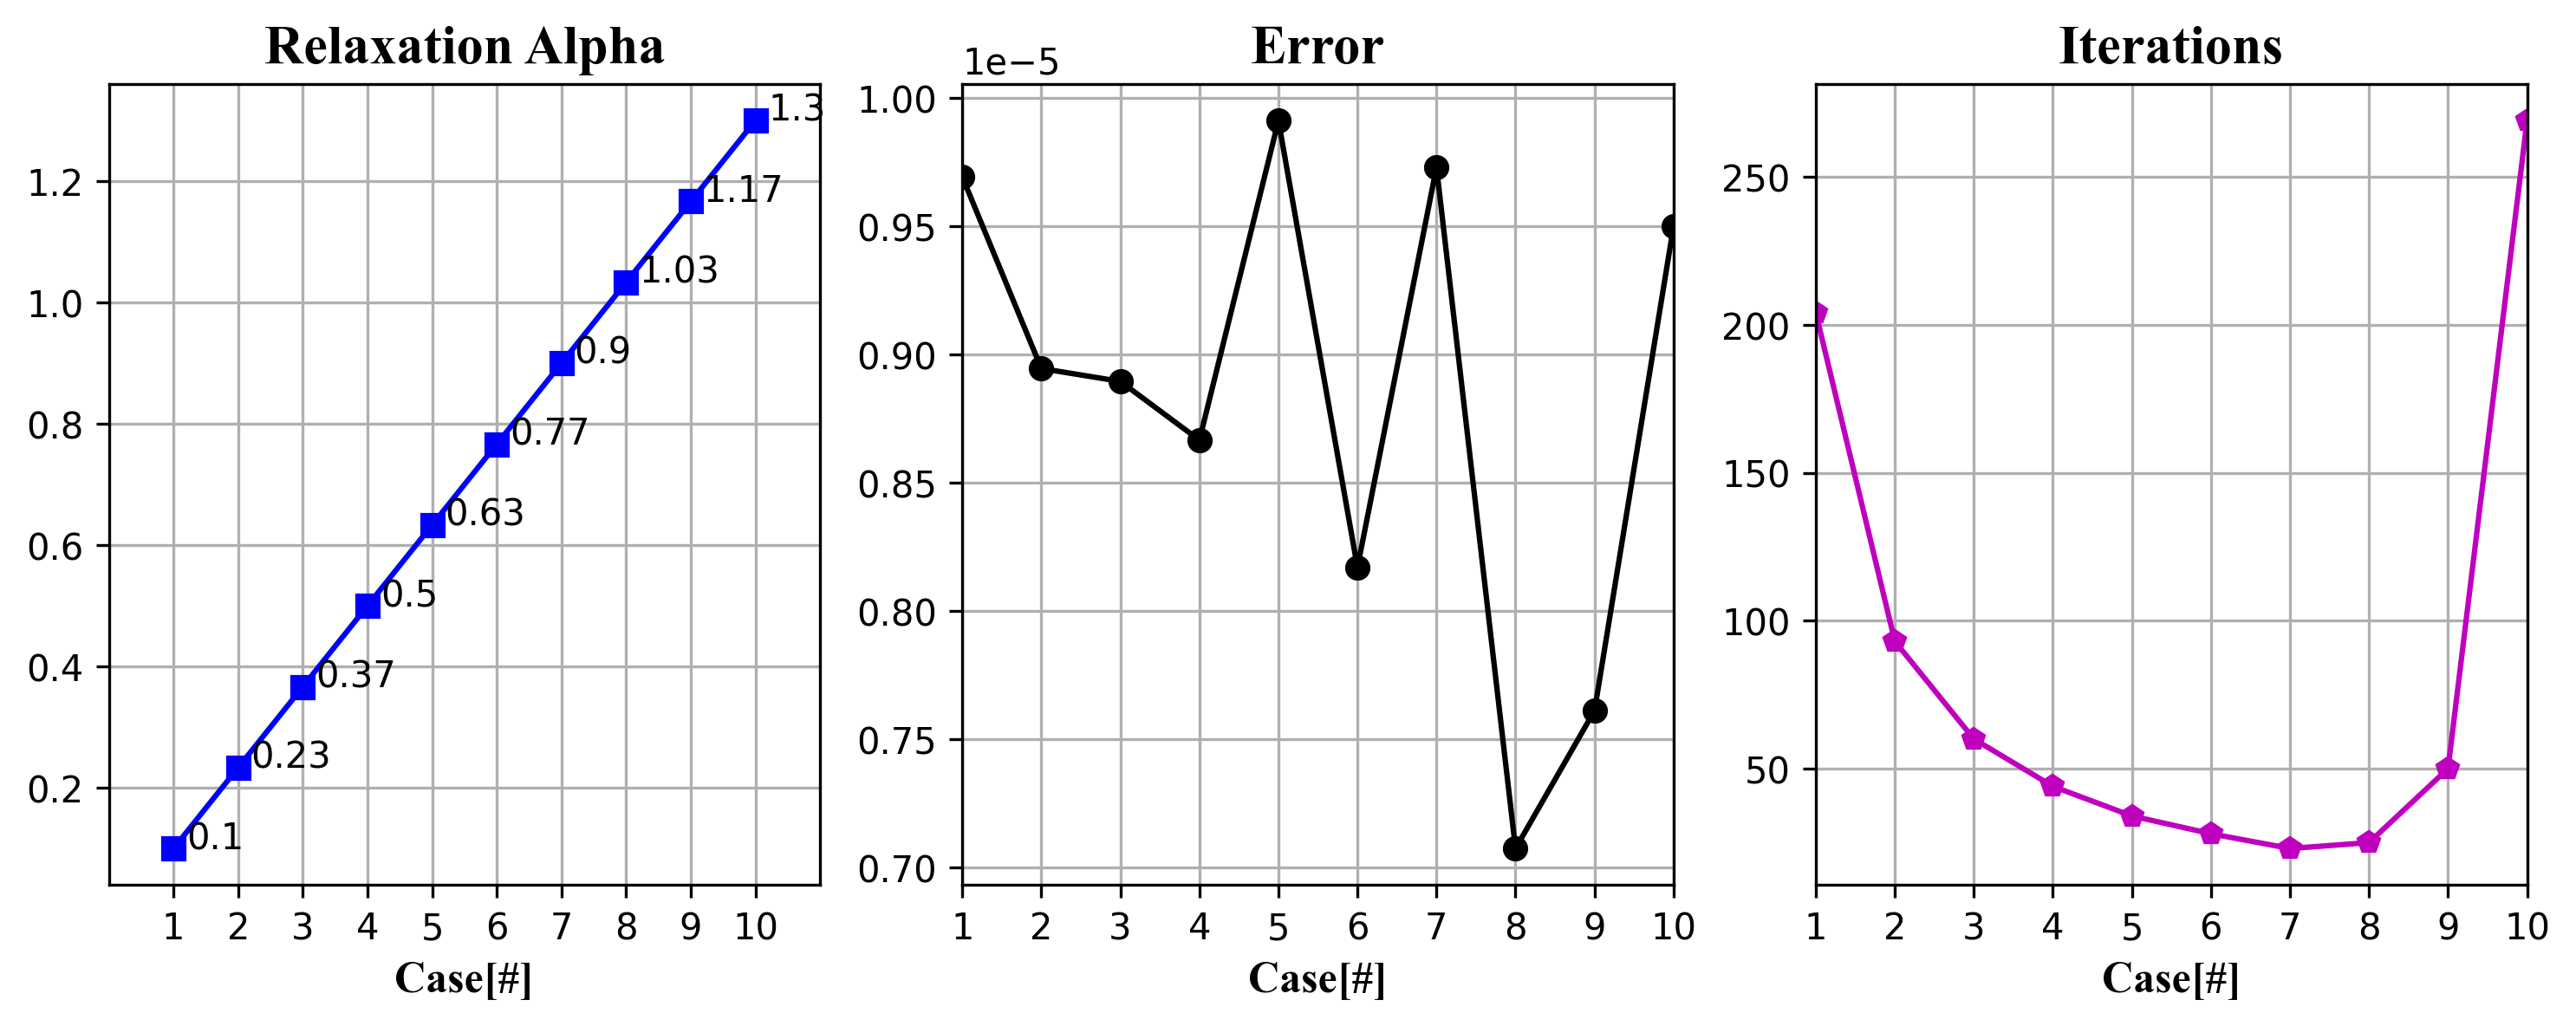

In [30]:
x = np.linspace(1, n, n)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4), dpi=300)
ax1.plot(x,alpha,'-bs', label='Alpha')
ax2.plot(x,err, '-ko', label='Error')
ax3.plot(x,it, '-mp', label='Iterations')
# ax.set_title('Numerical Result vs. Analytical Solution', fontsize = 15, fontweight = 'bold', fontfamily='Times New Roman')
# ax.set_xlabel('Distance $x(m)$',fontsize = 12, fontweight = 'bold', fontfamily='Times New Roman')
# ax.set_ylabel('Temperature ($^\circ$C)',fontsize = 12, fontweight = 'bold', fontfamily='Times New Roman')
# ax.set_xlim([np.min(x), np.max(x)])
# ax.set_ylim([0, 600])
ax1.set_title('Relaxation Alpha', fontsize = 15, fontweight = 'bold', fontfamily='Times New Roman')
ax2.set_title('Error', fontsize = 15, fontweight = 'bold', fontfamily='Times New Roman')
ax3.set_title('Iterations', fontsize = 15, fontweight = 'bold', fontfamily='Times New Roman')
    
for ax in (ax1, ax2, ax3):
    if ax == ax1:
        for i, j in zip(x,alpha):
            ax.annotate(j.round(2),(i+0.2,j))
        ax.set_xlim([np.min(x)-1,np.max(x)+1])
    ax.set_xticks(x)
    ax.set_xlabel('Case[#]',fontsize = 12, fontweight = 'bold', fontfamily='Times New Roman')
    if ax != ax1:
        ax.set_xlim([np.min(x), np.max(x)])
    ax.grid()
#     ax.legend()
plt.show()

## Gauss-Seidel method with relaxation  
$x_i^{(k)}=x_i^{(k-1)}+\alpha \left[\sum_{j=1}^{i-1}{\left(\frac{-a_{ij}}{a_{ii}}\right)x_j^{\left(k\right)}}+
\sum_{j=1}^{n}{\left(\frac{-a_{ij}}{a_{ii}}\right)x_j^{\left(k-1\right)}}
+\frac{b_i}{a_{ii}}\right]\ \ \left(i=1,\ 2,\ldots,n\ \right)$

In [37]:
# def Relaxation(alpha, n):
n = 3
u = u0.copy()
uold = u0.copy()
err = 1000
it = 1
alpha = 0.75
# while err > tol:
for k in range(100):
    # loop over interior points = don't touch boundary points
    for i in range(n):
        uold = u.copy()
        ax_sum, ax_sum2 = 0.0, 0.0
        for j in range(n):
            ax_sum += A[i,j]*u[j]
        for j in range(n):
            if(i != j):
                ax_sum2 += A[i,j]*u[j]
        u[i] = u[i] + alpha*(b[i] - ax_sum - ax_sum2)/A[i,i]
    err = np.linalg.norm(uold - u, 2)
    it += 1
print('err = %1.3e'% err, ' it = %d' %it)
u.round(2)
# return u, err, it

err = 1.857e+00  it = 101


array([-181.1 ,    2.05,  185.02])

## Successive Over-Relaxation(SOR)